In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
import pyreadr
edges = pyreadr.read_r('nobel_prize_data/data/edges.RData')['edges']
edges

cat  year      from   fromRole         to   toRole
0       Phy  1901    Q57078  Nominator     Q80956  Nominee
1       Phy  1901  Q6195832  Nominator     Q80956  Nominee
2       Phy  1901    Q18425  Nominator     Q41269  Nominee
3       Phy  1901   Q312288  Nominator    Q353818  Nominee
4       Phy  1901   Q164401  Nominator    Q353818  Nominee
...     ...   ...       ...        ...        ...      ...
162424  Med  1953   Q237142  Committee    Q117474  Nominee
162425  Med  1953   Q237142  Committee  Q21032025  Nominee
162426  Med  1953   Q237142  Committee        881  Nominee
162427  Med  1953   Q237142  Committee   Q1174949  Nominee
162428  Med  1953   Q237142  Committee       2358  Nominee

[162429 rows x 6 columns]

In [2]:
nodes =  pd.read_csv("nobel_prize_data/data/nodes.csv")
nodes=nodes.drop(columns=['link'])
nodes = nodes.dropna(subset=['QID'])

In [3]:
nominations_data = edges[(edges['fromRole']=='Nominator')&(edges['toRole']=='Nominee')]
laureates = nodes[~nodes['LaureateIDs'].isna()][['QID']]
laureates=laureates.rename(columns={"QID": "to"})
num_nom=pd.merge(laureates, nominations_data, how='inner',  on=["to"])
num_nom

to  cat  year      from   fromRole   toRole
0     Q102034  Med  1901   Q155768  Nominator  Nominee
1     Q102034  Med  1901   Q289217  Nominator  Nominee
2     Q102034  Med  1901      7691  Nominator  Nominee
3     Q102034  Med  1901      1253  Nominator  Nominee
4     Q102034  Med  1901      2028  Nominator  Nominee
...       ...  ...   ...       ...        ...      ...
8327  Q950726  Che  1904    Q97134  Nominator  Nominee
8328  Q950726  Che  1904  Q6079559  Nominator  Nominee
8329  Q950726  Che  1904  Q5716261  Nominator  Nominee
8330  Q950726  Che  1904   Q102822  Nominator  Nominee
8331  Q950726  Che  1904      9690  Nominator  Nominee

[8332 rows x 6 columns]

# Physics

In [4]:
Lit_edges = num_nom[num_nom['cat']=='Phy']
Lit_edges

to  cat  year     from   fromRole   toRole
15    Q102291  Phy  1922     9936  Nominator  Nominee
16    Q102291  Phy  1922   Q66183  Nominator  Nominee
17    Q102291  Phy  1922  Q189465  Nominator  Nominee
145   Q103835  Phy  1916   Q41585  Nominator  Nominee
146   Q103835  Phy  1917   Q41585  Nominator  Nominee
...       ...  ...   ...      ...        ...      ...
8297     Q949  Phy  1970    14481  Nominator  Nominee
8298     Q949  Phy  1970    14573  Nominator  Nominee
8299     Q949  Phy  1970    14432  Nominator  Nominee
8300     Q949  Phy  1970    15507  Nominator  Nominee
8301  Q950726  Phy  1904    Q9021  Nominator  Nominee

[2596 rows x 6 columns]

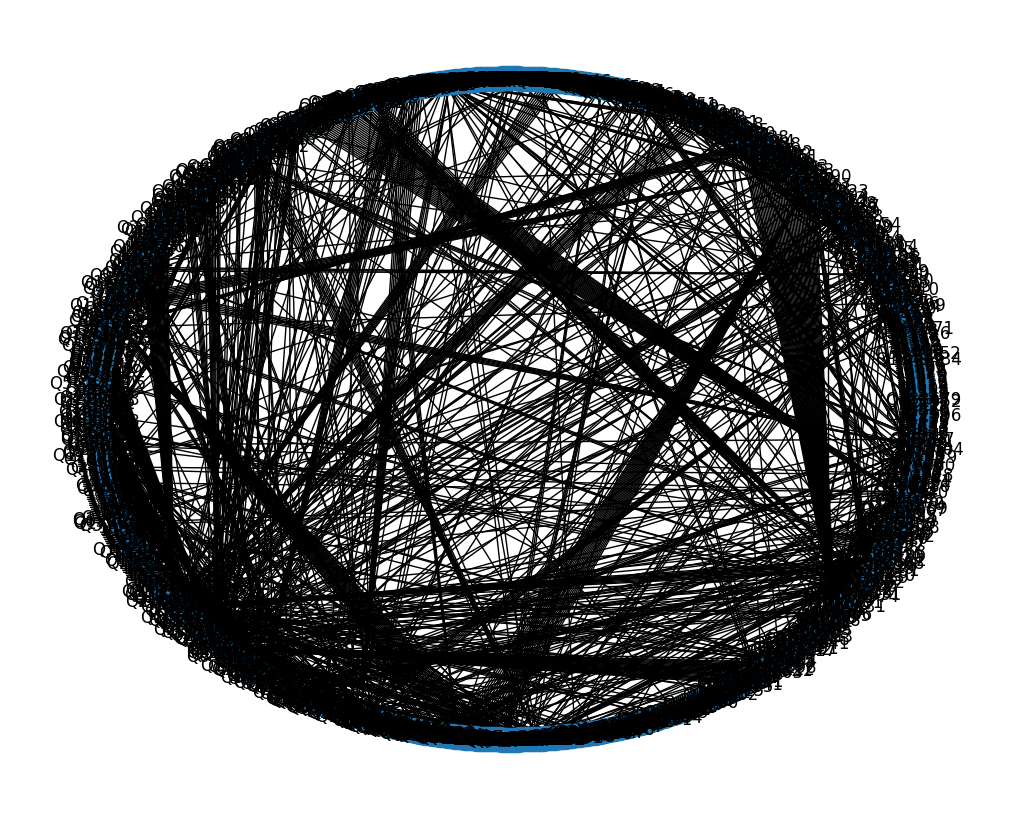

In [5]:
from networkx.algorithms.community import greedy_modularity_communities
import networkx as nx
from matplotlib.pyplot import figure
G = nx.Graph()
G = nx.from_pandas_edgelist(Lit_edges, "from", "to", ["year"])
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)
c = greedy_modularity_communities(G,weight ='num_nominations', resolution =1, cutoff =1)


### first communitie

In [6]:
com1=nodes[nodes['QID'].isin(c[0])]
com1['gender'].value_counts(normalize=True)

male      0.992593
female    0.007407
Name: gender, dtype: float64

### second communitie

In [7]:
com2=nodes[nodes['QID'].isin(c[1])]
com2['gender'].value_counts(normalize=True)

male      0.991935
female    0.008065
Name: gender, dtype: float64

### third communitie

In [8]:
com3=nodes[nodes['QID'].isin(c[2])]
com3['gender'].value_counts(normalize=True)

male      0.972973
female    0.027027
Name: gender, dtype: float64

### forth communitie

In [9]:
com4=nodes[nodes['QID'].isin(c[3])]
com4['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### fifth communitie

In [10]:
com5=nodes[nodes['QID'].isin(c[4])]
com5['gender'].value_counts(normalize=True)

male      0.965517
female    0.034483
Name: gender, dtype: float64

### sixth communitie

In [11]:
com6=nodes[nodes['QID'].isin(c[5])]
com6['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### seventh communitie

In [12]:
com7=nodes[nodes['QID'].isin(c[6])]
com7['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### eights communitie

In [13]:
com8=nodes[nodes['QID'].isin(c[7])]
com8['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

# Med

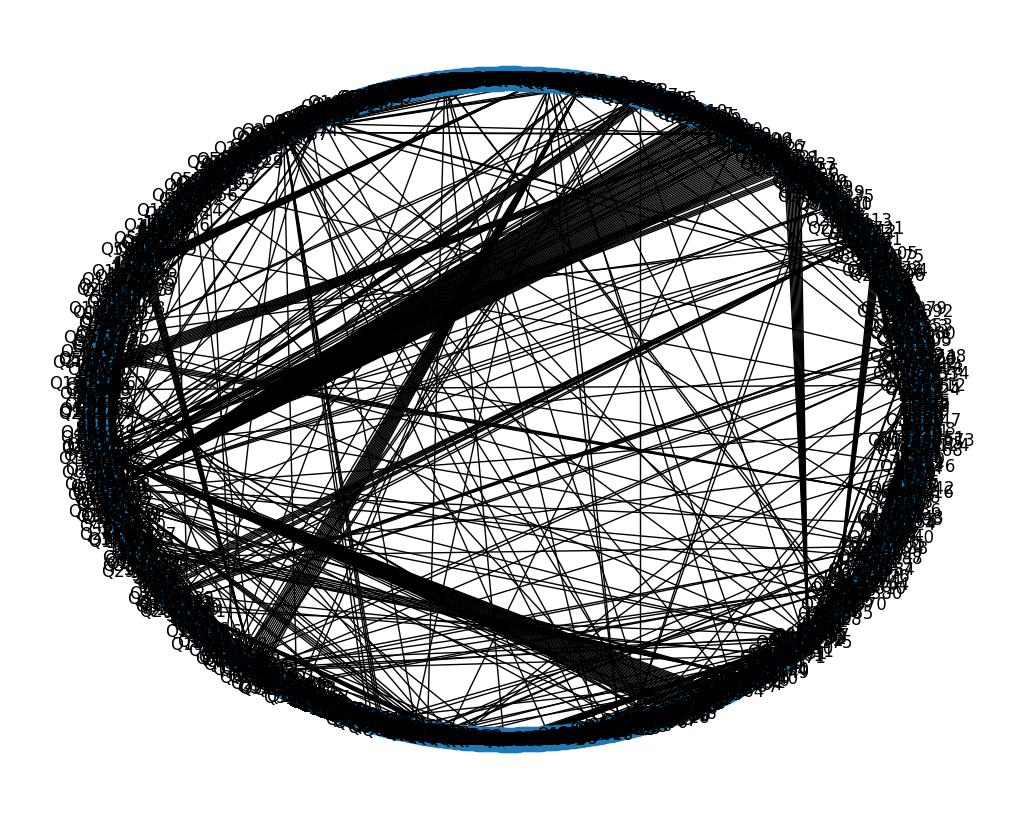

In [14]:
Lit_edges = num_nom[num_nom['cat']=='Med']
G = nx.Graph()
G = nx.from_pandas_edgelist(Lit_edges, "from", "to", ["year"])
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)
c = greedy_modularity_communities(G,weight ='num_nominations', resolution =1, cutoff =1)

### first communitie

In [15]:
com1=nodes[nodes['QID'].isin(c[0])]
com1['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### second communitie

In [16]:
com2=nodes[nodes['QID'].isin(c[1])]
com2['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### third communitie

In [17]:
com3=nodes[nodes['QID'].isin(c[2])]
com3['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### forth communitie

In [18]:
com4=nodes[nodes['QID'].isin(c[3])]
com4['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### fifth communitie

In [19]:
com5=nodes[nodes['QID'].isin(c[4])]
com5['gender'].value_counts(normalize=True)

male      0.969697
female    0.030303
Name: gender, dtype: float64

### sixth communitie

In [20]:
com6=nodes[nodes['QID'].isin(c[5])]
com6['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### seventh communitie

In [21]:
com7=nodes[nodes['QID'].isin(c[6])]
com7['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### eights communitie

In [22]:
com8=nodes[nodes['QID'].isin(c[7])]
com8['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

# Che

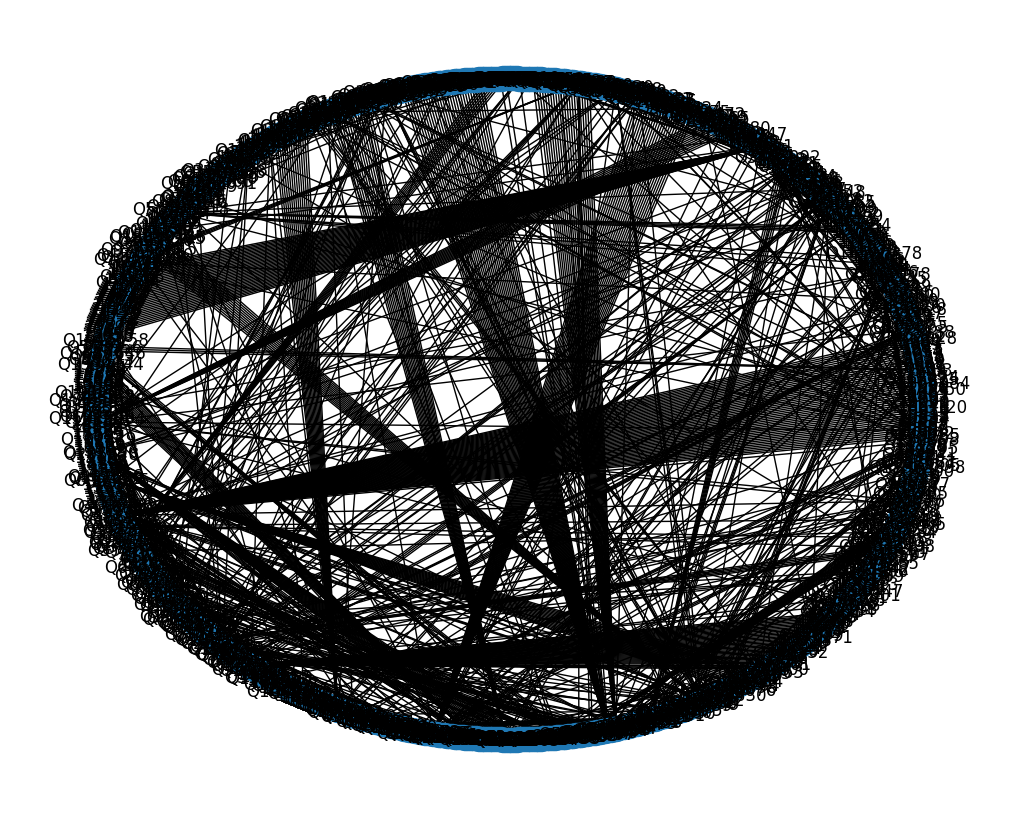

In [23]:
Lit_edges = num_nom[num_nom['cat']=='Che']
G = nx.Graph()
G = nx.from_pandas_edgelist(Lit_edges, "from", "to", ["year"])
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)
c = greedy_modularity_communities(G,weight ='num_nominations', resolution =1, cutoff =1)

### first communitie

In [24]:
com1=nodes[nodes['QID'].isin(c[0])]
com1['gender'].value_counts(normalize=True)

male      0.989691
female    0.010309
Name: gender, dtype: float64

### second communitie

In [25]:
com2=nodes[nodes['QID'].isin(c[1])]
com2['gender'].value_counts(normalize=True)

male      0.931034
female    0.068966
Name: gender, dtype: float64

### third communitie

In [26]:
com3=nodes[nodes['QID'].isin(c[2])]
com3['gender'].value_counts(normalize=True)

male      0.967213
female    0.032787
Name: gender, dtype: float64

### forth communitie

In [27]:
com4=nodes[nodes['QID'].isin(c[3])]
com4['gender'].value_counts(normalize=True)

male      0.944444
female    0.055556
Name: gender, dtype: float64

### fifth communitie

In [28]:
com5=nodes[nodes['QID'].isin(c[4])]
com5['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### sixth communitie

In [29]:
com6=nodes[nodes['QID'].isin(c[5])]
com6['gender'].value_counts(normalize=True)

male      0.909091
female    0.090909
Name: gender, dtype: float64

### seventh communitie

In [30]:
com7=nodes[nodes['QID'].isin(c[6])]
com7['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### eights communitie

In [31]:
com8=nodes[nodes['QID'].isin(c[7])]
com8['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

# Peace

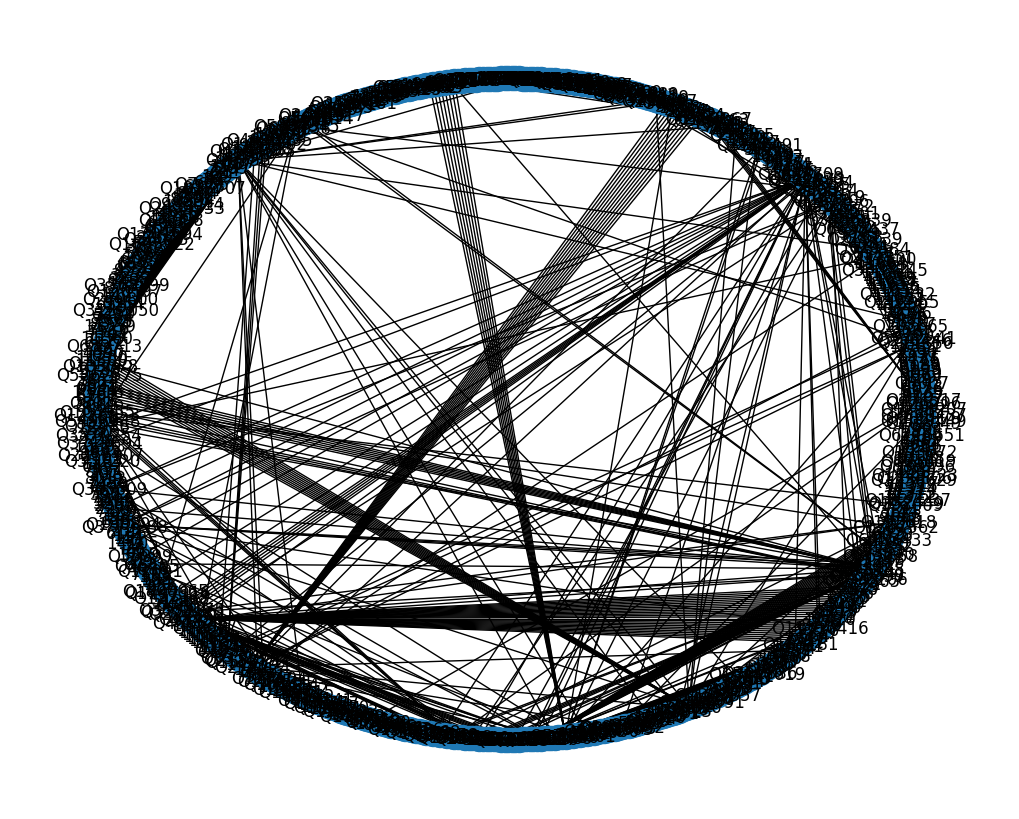

In [32]:
Lit_edges = num_nom[num_nom['cat']=='Pea']
G = nx.Graph()
G = nx.from_pandas_edgelist(Lit_edges, "from", "to", ["year"])
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)
c = greedy_modularity_communities(G,weight ='num_nominations', resolution =1, cutoff =1)

### first communitie

In [33]:
com1=nodes[nodes['QID'].isin(c[0])]
com1['gender'].value_counts(normalize=True)

male      0.967742
female    0.032258
Name: gender, dtype: float64

### second communitie

In [34]:
com2=nodes[nodes['QID'].isin(c[1])]
com2['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### third communitie

In [35]:
com3=nodes[nodes['QID'].isin(c[2])]
com3['gender'].value_counts(normalize=True)

male      0.857143
female    0.142857
Name: gender, dtype: float64

### forth communitie

In [36]:
com4=nodes[nodes['QID'].isin(c[3])]
com4['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### fifth communitie

In [37]:
com5=nodes[nodes['QID'].isin(c[4])]
com5['gender'].value_counts(normalize=True)

male      0.9
female    0.1
Name: gender, dtype: float64

### sixth communitie

In [38]:
com6=nodes[nodes['QID'].isin(c[5])]
com6['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### seventh communitie

In [39]:
com7=nodes[nodes['QID'].isin(c[6])]
com7['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### eights communitie

In [40]:
com8=nodes[nodes['QID'].isin(c[7])]
com8['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

# Littreture

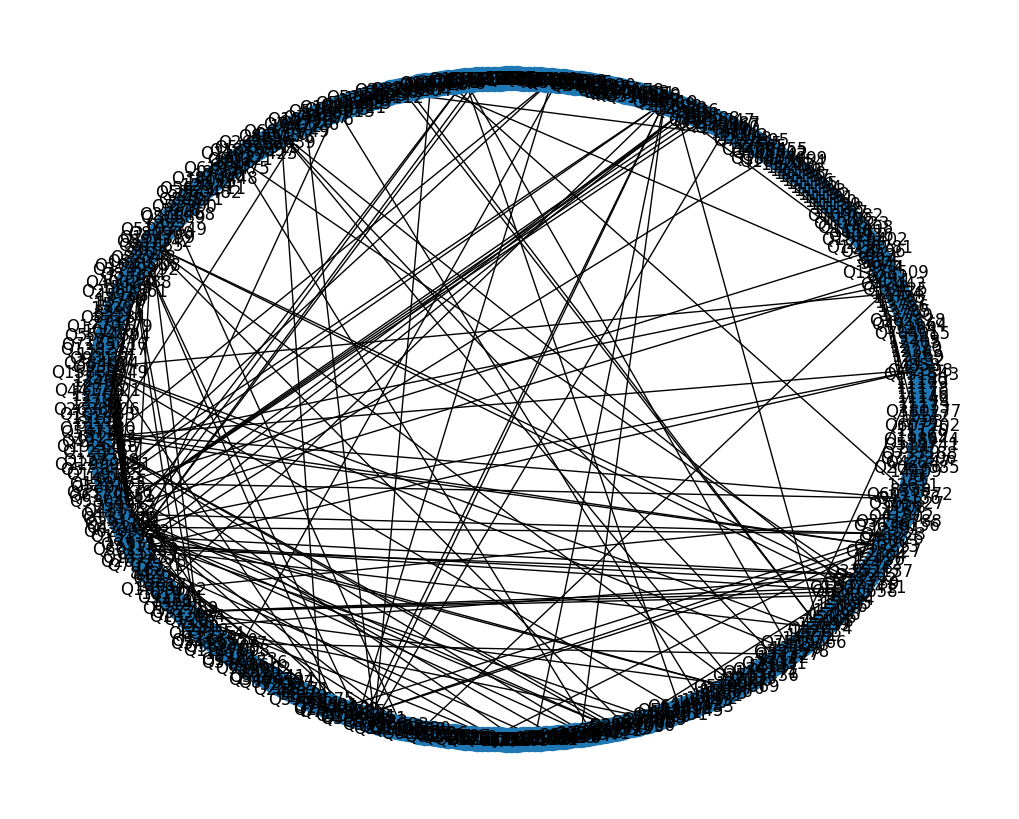

In [41]:
Lit_edges = num_nom[num_nom['cat']=='Lit']
G = nx.Graph()
G = nx.from_pandas_edgelist(Lit_edges, "from", "to", ["year"])
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)
c = greedy_modularity_communities(G,weight ='num_nominations', resolution =1, cutoff =1)

### first communitie

In [42]:
com1=nodes[nodes['QID'].isin(c[0])]
com1['gender'].value_counts(normalize=True)

male      0.95
female    0.05
Name: gender, dtype: float64

### second communitie

In [43]:
com2=nodes[nodes['QID'].isin(c[1])]
com2['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### third communitie

In [44]:
com3=nodes[nodes['QID'].isin(c[2])]
com3['gender'].value_counts(normalize=True)

male      0.96
female    0.04
Name: gender, dtype: float64

### forth communitie

In [45]:
com4=nodes[nodes['QID'].isin(c[3])]
com4['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### fifth communitie

In [46]:
com5=nodes[nodes['QID'].isin(c[4])]
com5['gender'].value_counts(normalize=True)

male      0.928571
female    0.071429
Name: gender, dtype: float64

### sixth communitie

In [47]:
com6=nodes[nodes['QID'].isin(c[5])]
com6['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### seventh communitie

In [48]:
com7=nodes[nodes['QID'].isin(c[6])]
com7['gender'].value_counts(normalize=True)

male    1.0
Name: gender, dtype: float64

### eights communitie

In [49]:
com8=nodes[nodes['QID'].isin(c[7])]
com8['gender'].value_counts(normalize=True)

male      0.944444
female    0.055556
Name: gender, dtype: float64